![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


### Data Cleaning

#### Droping Missin Values

In [327]:
insurance = insurance.dropna()

#### Age Column

In [328]:
insurance[ insurance['age'] < 18 ] = insurance[ insurance["age"] < 18 ] * -1

In [329]:
# Drop NaN values from the age column
insurance = insurance.dropna(subset=['age'])

# Change the type of the age column to int
insurance['age'] = insurance['age'].astype(int)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.924
1,18,male,33.770,1.0,no,Southeast,1725.5523
2,28,male,33.000,3.0,no,southeast,$4449.462
3,33,male,22.705,0.0,no,northwest,$21984.47061
4,32,male,28.880,0.0,no,northwest,$3866.8552


#### Sex Column

In [330]:
insurance[ 'sex' ].unique()

array(['female', 'male', '', 'woman', 'F', 'man', 'M'], dtype=object)

In [331]:
insurance['sex'] = insurance['sex'].replace({ 'woman': 'female', 
                                              'F': 'female',
                                              'man': 'male',
                                              'M': 'male'
})
                                            
insurance = insurance.dropna(subset = ['sex'])
insurance = insurance[insurance['sex'] != '']

insurance['sex'].unique()

array(['female', 'male'], dtype=object)

#### BMI Column

In [332]:
insurance = insurance.dropna(subset = ["bmi"])
insurance['bmi'] = insurance['bmi'].astype('float64')

#### Children Column

In [333]:
insurance['children'] = insurance['children'].astype('int')

In [334]:
insurance['children'] = insurance['children'].abs()

#### Region Column

In [335]:
insurance["region"].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [336]:
insurance["region"] = insurance["region"].replace({"Southeast": "southeast",
                                                   "Northwest": "northwest",
                                                   "Northeast": "northeast",
                                                   "Southwest": "southwest"
                                                   })

insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Charges Column

In [337]:
insurance["charges"] = insurance["charges"].str.replace("$", "").str.replace(",", "").astype(float)

#### Smoker Column

In [338]:
insurance["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [339]:
# change the smoker column to a bool

insurance["smoker"] = insurance["smoker"].replace({"yes": True, "no": False})
insurance["smoker"] = insurance["smoker"].astype(bool)
insurance["smoker"].unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_89056\2831919084.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance["smoker"] = insurance["smoker"].replace({"yes": True, "no": False})


array([ True, False])

In [340]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1149 non-null   int64  
 1   sex       1149 non-null   object 
 2   bmi       1149 non-null   float64
 3   children  1149 non-null   int64  
 4   smoker    1149 non-null   bool   
 5   region    1149 non-null   object 
 6   charges   1149 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.0+ KB


In [341]:
insurance.to_csv('insurance_cleaned.csv', index=False)

### Data Visualizing

Relationships between variables & charges

#### Age vs Charges

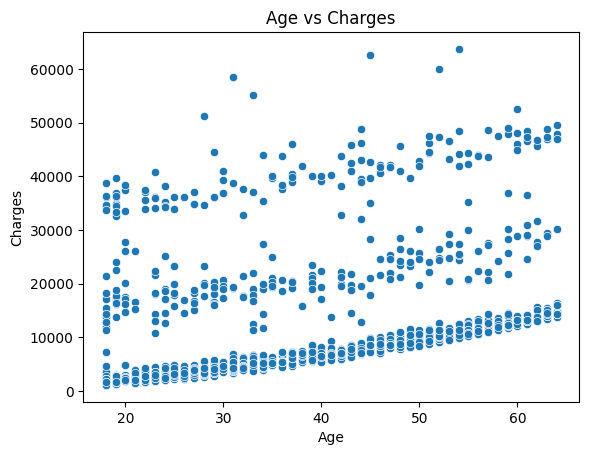

In [342]:
sns.scatterplot( x = 'age',
                y = 'charges',
                data = insurance,
                )
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### Charges by Gender

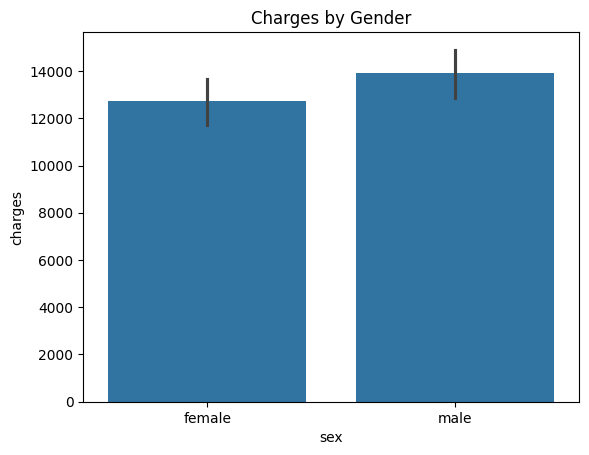

In [343]:
sns.barplot( x = 'sex', y = 'charges', data = insurance)
plt.title('Charges by Gender')
plt.show()

#### BMI vs Charges

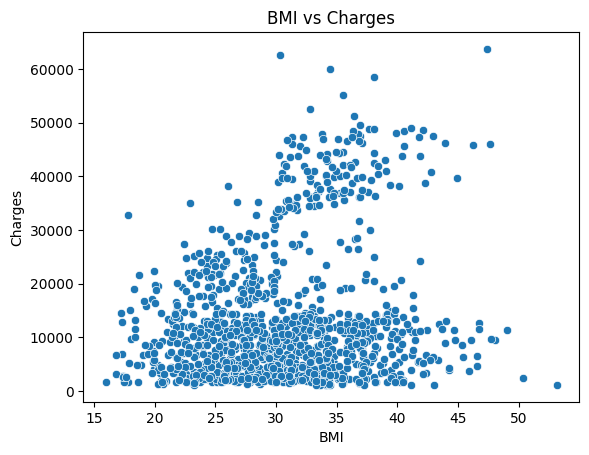

In [344]:
sns.scatterplot( x = 'bmi', y = 'charges', data = insurance)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#### Smoker by Charges

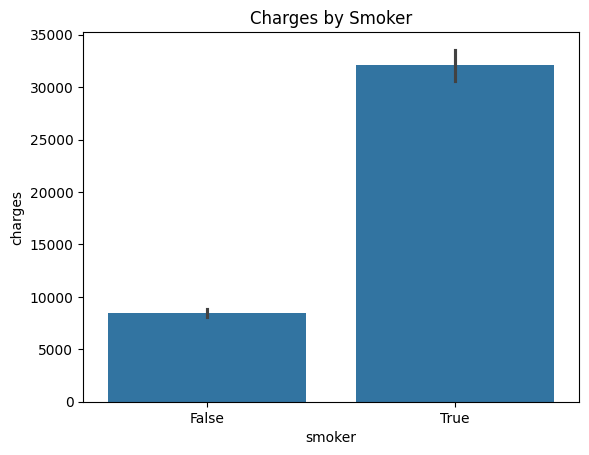

In [345]:
sns.barplot( x = 'smoker', y = 'charges', data = insurance)
plt.title('Charges by Smoker')
plt.show()

### Preparing Dataset for Modelling

In [346]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
830,63,male,33.100,0,False,southwest,13393.75600
46,18,female,38.665,2,False,northeast,3393.35635
657,27,male,33.155,2,False,northwest,4058.71245
576,22,male,26.840,0,False,southeast,1664.99960
507,21,male,23.750,2,False,northwest,3077.09550


In [347]:
insurance['smoker'] = insurance['smoker'].astype(int)

insurance = pd.get_dummies(insurance, columns = ['sex', 'region'])
insurance.head()



,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,True,False,False,False,False,True
1,18,33.770,1,0,1725.55230,False,True,False,False,True,False
2,28,33.000,3,0,4449.46200,False,True,False,False,True,False
3,33,22.705,0,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,0,3866.85520,False,True,False,True,False,False


In [348]:
# Convert boolean columns to integers in the insurance DataFrame
bool_cols = insurance.select_dtypes(include=['bool']).columns
insurance[bool_cols] = insurance[bool_cols].astype(int)

In [355]:
insurance.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.427171,-0.439874,-0.905112,1,16884.92400,1,0,0,0,0,1
1,-1.497807,0.519066,-0.072467,0,1725.55230,0,1,0,0,1,0
2,-0.791445,0.393276,1.592823,0,4449.46200,0,1,0,0,1,0
3,-0.438264,-1.288543,-0.905112,0,21984.47061,0,1,0,1,0,0
4,-0.508900,-0.279778,-0.905112,0,3866.85520,0,1,0,1,0,0


In [349]:
# Select numeric columns
numeric_cols = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

insurance[numeric_cols] = scaler.fit_transform(insurance[numeric_cols])

### Fitting Regression Model

In [350]:
X = insurance.drop(columns = 'charges')
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [351]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [352]:
y_pred = model.predict(X_test)

In [353]:
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = round(mse, 2)
r2 = round(r2, 2)

In [354]:
print(f''' 
      Mean Squared Error: {mse} 
      R2 Score: {r2}
    ''')

 
      Mean Squared Error: 42170261.0 
      R2 Score: 0.67
    


### Validating Model

In [357]:
validation_data = pd.read_csv('validation_dataset.csv')
validation_data.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [364]:
def preprocess_data(df):
    df = df.dropna()
    df['age'] = df['age'].abs()
    df['children'] = df['children'].abs()
    df['smoker'] = df['smoker'].replace({'yes': True, 'no': False})
    df['smoker'] = df['smoker'].astype(int)
    
    df = pd.get_dummies(df, columns = ['sex', 'region'])

    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)

    df[numeric_cols] = scaler.transform(df[numeric_cols])

    return df


In [365]:
df = preprocess_data(validation_data)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_89056\1736546701.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': True, 'no': False})


In [367]:
predictions = model.predict(df)

predictions[predictions < 0] = 1000

In [368]:
df['predicted_charges'] = predictions
df.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,predicted_charges
0,-1.497807,-1.062286,-0.072467,0,1,0,0,0,1,0,120.718837
1,-0.014447,-0.683284,-0.905112,1,0,1,1,0,0,0,32010.178203
2,-0.862081,-0.235670,-0.905112,1,0,1,0,0,1,0,28797.607123
3,2.245911,5.702914,9.919273,1,0,1,0,0,1,0,55369.260548
4,-0.791445,1.219892,-0.905112,0,0,1,0,0,1,0,7143.063796
